## Li ion diffusion model inside solid state

Ref. [Solving the Heat Diffusion Equation (1D PDE) in Python](https://www.youtube.com/watch?v=6-2Wzs0sXd8&feature=youtu.be)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
from IPython.display import HTML
import time
from decimal import *
import matplotlib.cm as cm

In [3]:
#Temperature
T = 298#[K]
temp_0 = 23 + 273.15#[K]

#Dimension
L1 = 100E-6 #[m]
L2 = 200E-6 #[m]
L3 = 300E-6 #[m]
L4 = 400E-6 #[m]
L5 = 500E-6 #[m]
M = 100E-6 #[m]
N = 100E-6 #[m]
S = M * N#[m2]

Al_length = L1
Cu_length = L5 - L4
P_length = L2-L1
N_length = L4-L3

#Current
I = 6.4E-7#[A = C/sec]
j = I/S*0.1#(0.1ItA)[A/m2 = C/sec m2]
#Constant
R = 8.3144598 #[J/(mol K)]
F = 96485.33289 #[C/mol]
z = 1
alpha=0.5
k_o_p = 7.13E-8
k_o_n = 1.47E-7
C_e = 1000#[mol/m3]
C_s_max_p = 2.39E4 #[mol/m3]
C_s_max_n = 1.61E4 #[mol/m3]

#Diffusion coefficient
D_p = 1.0E-12#[m2/s]
D_n = 1.0E-12 #[m2/s]


In [4]:
t1 = time.time()
# Number of partitions of rod (finite elements)
n = 50
dx = P_length/n

t_total = 60*60*10 #[sec] run time
dt = 0.5 #[sec] Time partitions
t_total +=dt
# Make an array with positions of middle of each partition
x = np.linspace(dx/2, P_length - dx/2,n)

# Initialize rod to initial temperature distribution.
C = np.ones(len(x))*0 
dCdt = np.empty(n)

t = np.arange(0,t_total,dt)

time_rlt = np.zeros(len(t))
x_rlt = np.zeros((len(t),len(x)))
C_rlt = np.zeros((len(t),len(C)))

for jj in range(1,len(t)+1):
    for i in range(1,n-1):

        # Applying discrete definition of second derivative
        dCdt[i] = D_p*((C[i+1] - C[i])/dx - (C[i] - C[i-1])/dx)/dx
        
    # Taking into account boundary condition. ie. T[0-1] DNE
    dCdt[0] = D_p*((C[1] - C[0])/dx)/dx
    dCdt[n-1] = D_p*(j*S/F/D_p - (C[n-1] - C[n-2])/dx)/dx
    
    # Update temperature data for rod
    C = C + dCdt * dt

    time_rlt[jj-1] = (jj-1)*dt
    x_rlt[jj-1] = x #
    C_rlt[jj-1] = C #concentration per dx
    if jj % divmod(len(t), 10)[0] == 0:
        print('{}'.format(jj/(len(t)-1)*100),'% processed ')

t2 = time.time()
print('{:.2}'.format(t2-t1),'sec')
plt.clf()

10.0 % processed 
20.0 % processed 
30.0 % processed 
40.0 % processed 
50.0 % processed 
60.0 % processed 
70.0 % processed 
80.0 % processed 
90.0 % processed 
100.0 % processed 
6.4 sec


<Figure size 432x288 with 0 Axes>

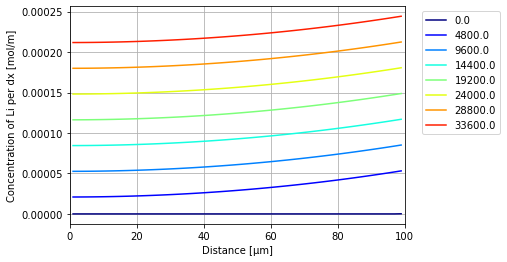

In [12]:
tt=60*80#[sec] delta time for plot
for ii in range(len(time_rlt[time_rlt % tt == 0])):
    plt.plot(x_rlt[time_rlt % tt == 0][ii]*1E6,C_rlt[time_rlt % tt == 0][ii], label = time_rlt[time_rlt % tt == 0][ii],color=cm.jet(ii/len(time_rlt[time_rlt % tt == 0])))
plt.legend(loc='upper right',
           bbox_to_anchor=(0.9, 0.9, 0.4, .100))
plt.ylabel('Concentration of Li per dx [mol/m]')
plt.xlabel('Distance [μm]')
plt.xlim(0,100)
plt.grid()
plt.show()

In [7]:
#Total mol of Li + from above simulation
sum(C)*dx #[mol]

2.387960875489463e-08

In [11]:
# Total charged mol from calculation I x time
60*60*10*(j*S)/F

2.3879277098278974e-08

In [12]:
# Delta is not exactly same.... Need to consider.
sum(C)*dx - 60*60*10*(j*S)/F

3.3165661565555013e-13

In [16]:
t1 = time.time()
# Number of partitions of rod (finite elements)
n = 5
dx = P_length/n

t_total = 60*60*10 #[sec] run time
dt = 0.5 #[sec] Time partitions
t_total +=dt
# Make an array with positions of middle of each partition
x = np.linspace(dx/2, P_length - dx/2,n)

# Initialize rod to initial temperature distribution.
C = np.ones(len(x))*0 
dCdt = np.empty(n)

t = np.arange(0,t_total,dt)

time_rlt = np.zeros(len(t))
x_rlt = np.zeros((len(t),len(x)))
C_rlt = np.zeros((len(t),len(C)))

for jj in range(1,len(t)+1):
    for i in range(1,n-1):

        # Applying discrete definition of second derivative
        dCdt[i] = D_p*((C[i+1] - C[i])/dx - (C[i] - C[i-1])/dx)/dx
        
    # Taking into account boundary condition. ie. T[0-1] DNE
    dCdt[0] = D_p*((C[1] - C[0])/dx)/dx
    dCdt[n-1] = D_p*(-j*S/F/D_p - (C[n-1] - C[n-2])/dx)/dx
    
    # Update temperature data for rod
    C = C + dCdt * dt

    time_rlt[jj-1] = (jj-1)*dt
    x_rlt[jj-1] = x #
    C_rlt[jj-1] = C #concentration per dx
    if jj % divmod(len(t), 10)[0] == 0:
        print('{}'.format(jj/(len(t)-1)*100),'% processed ')

t2 = time.time()
print('{:.2}'.format(t2-t1),'sec')
plt.clf()

10.0 % processed 
20.0 % processed 
30.0 % processed 
40.0 % processed 
50.0 % processed 
60.0 % processed 
70.0 % processed 
80.0 % processed 
90.0 % processed 
100.0 % processed 
0.86 sec


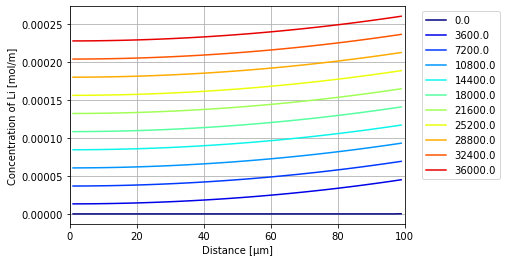

In [11]:
tt=60*60#[sec] delta time for plot
for ii in range(len(time_rlt[time_rlt % tt == 0])):
    plt.plot(x_rlt[time_rlt % tt == 0][ii]*1E6,C_rlt[time_rlt % tt == 0][ii], label = time_rlt[time_rlt % tt == 0][ii],color=cm.jet(ii/len(time_rlt[time_rlt % tt == 0])))
plt.legend(loc='upper right',
           bbox_to_anchor=(0.9, 0.9, 0.4, .100))
plt.ylabel('Concentration of Li [mol/m]')
plt.xlabel('Distance [μm]')
plt.xlim(0,100)
plt.grid()
plt.show()

# Memo

In [25]:
t1 = time.time()
# Number of partitions of rod (finite elements)
n = 5
dx = P_length/n

t_total = 60*60*10/10 #[sec] run time
dt = 2 #[sec] Time partitions

# Make an array with positions of middle of each partition
x = np.linspace(dx/2, P_length - dx/2,n)

# Initialize rod to initial temperature distribution.
C = np.ones(len(x))*0 
dCdt = np.empty(n)

t = np.arange(0,t_total,dt)

fig = plt.figure()
ims = [] 
for jj in range(1,len(t)):
    for i in range(1,n-1):

        # Applying discrete definition of second derivative
        dCdt[i] = D_p*((C[i+1] - C[i])/dx - (C[i] - C[i-1])/dx)/dx
        
    # Taking into account boundary condition. ie. T[0-1] DNE
    dCdt[0] = D_p*((C[1] - C[0])/dx)/dx
    dCdt[n-1] = D_p*(j*S/F/D_p - (C[n-1] - C[n-2])/dx)/dx
    
    # Update temperature data for rod
    C = C + dCdt * dt
    plt.xlabel('Distance [μm]')
    plt.ylabel('Concentration of Li [mol]')
    pt = plt.plot(x*10E6,C, color = 'black')
    ims.append(pt)
    if jj % 100 == 0:
        print('{}'.format(jj),'/{}'.format(len(t)),'processed ')

ani = animation.ArtistAnimation(fig,ims,interval=10) # interval[milliseconds]
ani.save("model4.mp4", writer="ffmpeg")

t2 = time.time()
print(t2-t1)
plt.clf()

100 /1800 processed 
200 /1800 processed 
300 /1800 processed 
400 /1800 processed 
500 /1800 processed 
600 /1800 processed 
700 /1800 processed 
800 /1800 processed 
900 /1800 processed 
1000 /1800 processed 
1100 /1800 processed 
1200 /1800 processed 
1300 /1800 processed 
1400 /1800 processed 
1500 /1800 processed 
1600 /1800 processed 
1700 /1800 processed 
121.73760795593262


print('{}'.format(jj),'/{}'.format(len(t)),'processed ')

In [489]:
0.000025*10*F*P_length#[C]

0.0024121333222500005

In [180]:
#Input　coulomb
60*60*10*j*S#[C]

0.002304

In [181]:
C_s_max_p*P_length*S*F#[C]

0.0023059994560710004

In [2]:
#Temperature
T = 298#[K]
temp_0 = 23 + 273.15#[K]

#Dimension
L1 = Decimal("100E-6")#[m]
L2 = Decimal("200E-6")#[m]
L3 = Decimal("300E-6")#[m]
L4 = Decimal("400E-6")#[m]
L5 = Decimal("500E-6")#[m]
M = Decimal("100E-6")#[m]
N = Decimal("100E-6")#[m]
S = M * N#[m2]

Al_length = L1
Cu_length = L5 - L4
P_length = L2-L1
N_length = L4-L3

#Current
I = Decimal("5E-7")#[A = C/s]
j = I/S*Decimal("0.1")#(0.1ItA)
#Constant
R = Decimal("8.3144598")#[J/(mol K)]
F = Decimal("96485.33289")#[C/mol]
z = 1
alpha=0.5
k_o_p = Decimal("7.13E-8")
k_o_n = Decimal("1.47E-7")
C_e = Decimal("1000")#[mol/m3]
C_s_max_p = Decimal("2.39E4")#[mol/m3]
C_s_max_n = Decimal("1.61E4")#[mol/m3]

#Diffusion coefficient
D_p = Decimal("1.0E-10")#[m2/s]
D_n = Decimal("3.9E-16")#[m2/s]



In [31]:
x = np.linspace(Decimal(dx),  Decimal(dx),Decimal(n))

/Users/takumkawahara/anaconda3/envs/keras/lib/python3.5/site-packages/ipykernel/__main__.py:1: DeprecationWarning: object of type <class 'decimal.Decimal'> cannot be safely interpreted as an integer.
  if __name__ == '__main__':


TypeError: unsupported operand type(s) for *: 'decimal.Decimal' and 'float'

In [19]:
t1 = time.time()
# Number of partitions of rod (finite elements)
n = Decimal("5")
dx = Decimal(P_length/n)

t_total = Decimal("60")*Decimal("60")*Decimal("10")/Decimal("60") #[sec] run time
dt = Decimal("2") #[sec] Time partitions

# Make an array with positions of middle of each partition
x = np.linspace(dx/Decimal("2"), P_length - dx/Decimal("2"),n)

# Initialize rod to initial temperature distribution.
C = np.ones(len(x))*0 
dCdt = np.empty(n)

t = np.arange(0,t_total,dt)

fig = plt.figure()
ims = [] 
for jj in range(1,len(t)):
    for i in range(1,n-1):

        # Applying discrete definition of second derivative
        dCdt[i] = D_p*((C[i+1] - C[i])/dx - (C[i] - C[i-1])/dx)/dx
        
    # Taking into account boundary condition. ie. T[0-1] DNE
    dCdt[0] = D_p*((C[1] - C[0])/dx)/dx
    dCdt[n-1] = D_p*(j*S/F/D_p - (C[n-1] - C[n-2])/dx)/dx


    # Update temperature data for rod
    C = C + dCdt * dt
    plt.xlabel('Distance [m]')
    plt.ylabel('Concentration of Li [mol]')
    pt = plt.plot(x,C)
    ims.append(pt)

ani = animation.ArtistAnimation(fig,ims,interval=10) # アニメ関数
ani.save("model4.mp4", writer="ffmpeg")
#HTML(ani.to_html5_video())
t2 = time.time()
elapsed_time = t2-t1
print(elapsed_time)

TypeError: unsupported operand type(s) for *: 'decimal.Decimal' and 'float'

In [144]:
t1 = time.time()
D_p = Decimal("1E-10")#[m2/s]
# Number of partitions of rod (finite elements)
n = Decimal("5")

dx = P_length/n

t_total = Decimal("60")*Decimal("60")*Decimal("10")/Decimal("60") #[sec] run time
dt = Decimal("2") #[sec] Time partitions

# Make an array with positions of middle of each partition
x = np.linspace(dx/Decimal("2"), P_length - dx/Decimal("2"),n)

/Users/takumkawahara/anaconda3/envs/keras/lib/python3.5/site-packages/ipykernel/__main__.py:11: DeprecationWarning: object of type <class 'decimal.Decimal'> cannot be safely interpreted as an integer.


TypeError: unsupported operand type(s) for *: 'decimal.Decimal' and 'float'